In [1]:
# Predict asteroid diameter values using 'Asteroid.csv' data set from Kaggle (contributed by Victor Basu)
# Model: XGBRegressor; in addition comparison with Linear Regression model will be made
# Notes on data: 
    # data is medium size comprising of 839736 entries and 27 columns
    # for a small portion of the data (~ 1/6) the asteroids diameters are known - this portion will be used to train the model
    # subsequently the model will be used to predict the diameters for the data in which this information is missing

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5)

In [3]:
# read data

data = pd.read_csv('Asteroid.csv', low_memory = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
full_name         839736 non-null object
a                 839734 non-null float64
e                 839736 non-null float64
G                 119 non-null float64
i                 839736 non-null float64
om                839736 non-null float64
w                 839736 non-null float64
q                 839736 non-null float64
ad                839730 non-null float64
per_y             839735 non-null float64
data_arc          823947 non-null float64
condition_code    838743 non-null object
n_obs_used        839736 non-null int64
H                 837042 non-null float64
diameter          137681 non-null object
extent            18 non-null object
albedo            136452 non-null float64
rot_per           18796 non-null float64
GM                14 non-null float64
BV                1021 non-null float64
UB                979 non-null float64
IR                1 non-null f

In [4]:
data.columns

Index(['full_name', 'a', 'e', 'G', 'i', 'om', 'w', 'q', 'ad', 'per_y',
       'data_arc', 'condition_code', 'n_obs_used', 'H', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'neo',
       'pha', 'moid'],
      dtype='object')

In [5]:
# select only features with a meaningful amount of non-null values
# drop 'full_name' and 'n_obs_used' which are not important for our problem
# place the target 'diameter' at the end for easier separation of features, X, and target, y, later on

data = data[['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code',
             'H', 'albedo', 'neo', 'pha', 'moid', 'diameter']]
data.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,H,albedo,neo,pha,moid,diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,3.34,0.0900,N,N,1.594780,939.4
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,4.13,0.1010,N,N,1.233240,545
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,5.33,0.2140,N,N,1.034540,246.596
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,3.20,0.4228,N,N,1.139480,525.4
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,6.85,0.2740,N,N,1.095890,106.699
5,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,0,5.71,0.2679,N,N,0.973965,185.18
6,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,0,5.51,0.2766,N,N,0.846100,199.83
7,2.201764,0.156499,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655.0,0,6.49,0.2260,N,N,0.874176,147.491
8,2.385637,0.123114,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821.0,0,6.28,0.1180,N,N,1.106910,190
9,3.141539,0.112461,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175.0,0,5.43,0.0717,N,N,1.778390,407.12


In [6]:
# EDA - looking into some of the features

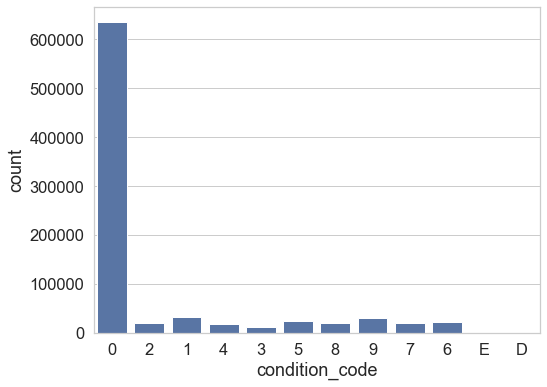

In [7]:
# look at 'condition_code'

plt.figure(figsize = (8, 6))
sns.countplot(data['condition_code'], color = 'b')
plt.show()

In [8]:
# overwhelming majority of data points are with condition_code = 0
# interesting that the condition_code notation includes numbers and letters

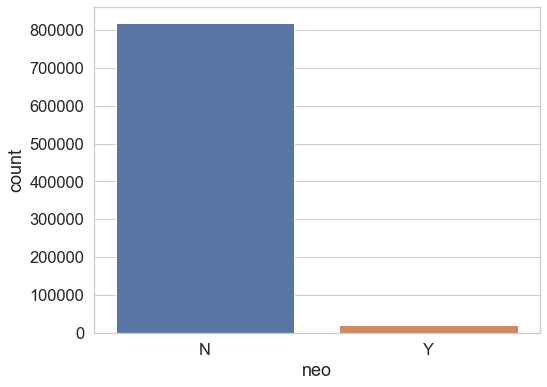

In [9]:
# look at 'neo'

plt.figure(figsize = (8, 6))
sns.countplot(data['neo'])
plt.show()

In [10]:
# overwhelming majority of data points = N

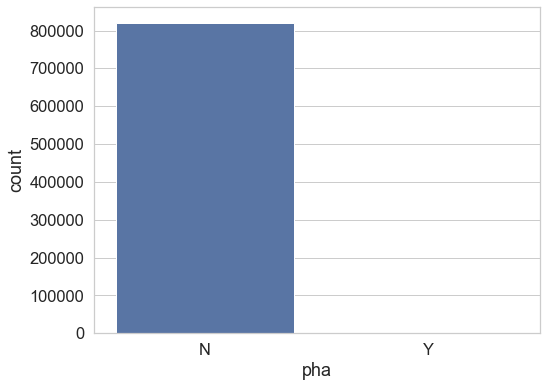

In [11]:
# look at 'pha'

plt.figure(figsize = (8, 6))
sns.countplot(data['pha'])
plt.show()

In [12]:
# overwhelming majority of data points = N

In [13]:
# data cleaning and preparation

In [14]:
# all three of the above features are strongly unbalanced, thus, we will remove them from data

data.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'H', 'albedo', 'neo', 'pha', 'moid', 'diameter'],
      dtype='object')

In [15]:
data = data[['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'H', 'albedo', 'moid', 'diameter']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 13 columns):
a           839734 non-null float64
e           839736 non-null float64
i           839736 non-null float64
om          839736 non-null float64
w           839736 non-null float64
q           839736 non-null float64
ad          839730 non-null float64
per_y       839735 non-null float64
data_arc    823947 non-null float64
H           837042 non-null float64
albedo      136452 non-null float64
moid        822814 non-null float64
diameter    137681 non-null object
dtypes: float64(12), object(1)
memory usage: 83.3+ MB


In [16]:
# although 'diameter' is supposed to have numerical values, it appears that it is in string format
# convert data to numeric format

data = data.astype('float64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 13 columns):
a           839734 non-null float64
e           839736 non-null float64
i           839736 non-null float64
om          839736 non-null float64
w           839736 non-null float64
q           839736 non-null float64
ad          839730 non-null float64
per_y       839735 non-null float64
data_arc    823947 non-null float64
H           837042 non-null float64
albedo      136452 non-null float64
moid        822814 non-null float64
diameter    137681 non-null float64
dtypes: float64(13)
memory usage: 83.3 MB


In [17]:
# replace all missing values with 0s which is the sparse value expected by XGBoost

data.fillna(0, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 13 columns):
a           839736 non-null float64
e           839736 non-null float64
i           839736 non-null float64
om          839736 non-null float64
w           839736 non-null float64
q           839736 non-null float64
ad          839736 non-null float64
per_y       839736 non-null float64
data_arc    839736 non-null float64
H           839736 non-null float64
albedo      839736 non-null float64
moid        839736 non-null float64
diameter    839736 non-null float64
dtypes: float64(13)
memory usage: 83.3 MB


In [18]:
# all nulls a filled

In [19]:
# create data set, data_1, where diameter is known

data_1 = data[data['diameter'] > 0] # 0 values represent data with unknown diameter
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137681 entries, 0 to 810411
Data columns (total 13 columns):
a           137681 non-null float64
e           137681 non-null float64
i           137681 non-null float64
om          137681 non-null float64
w           137681 non-null float64
q           137681 non-null float64
ad          137681 non-null float64
per_y       137681 non-null float64
data_arc    137681 non-null float64
H           137681 non-null float64
albedo      137681 non-null float64
moid        137681 non-null float64
diameter    137681 non-null float64
dtypes: float64(13)
memory usage: 14.7 MB


In [20]:
# data with known asteroid diameter have total of 137681 entries

In [21]:
# create data set, data_2, where diameter is unknown

data_2 = data[data['diameter'] < data_1['diameter'].min()] # this leaves only 0 values which represent unknown diameter
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702055 entries, 681 to 839735
Data columns (total 13 columns):
a           702055 non-null float64
e           702055 non-null float64
i           702055 non-null float64
om          702055 non-null float64
w           702055 non-null float64
q           702055 non-null float64
ad          702055 non-null float64
per_y       702055 non-null float64
data_arc    702055 non-null float64
H           702055 non-null float64
albedo      702055 non-null float64
moid        702055 non-null float64
diameter    702055 non-null float64
dtypes: float64(13)
memory usage: 75.0 MB


In [22]:
# data with unknown asteroid diameter have total of 702055 entries (more than 5 x that of data_1)

In [23]:
# check data_1
data_1.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,H,albedo,moid,diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,3.34,0.0900,1.594780,939.400
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,4.13,0.1010,1.233240,545.000
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,5.33,0.2140,1.034540,246.596
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,3.20,0.4228,1.139480,525.400
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,6.85,0.2740,1.095890,106.699
5,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,5.71,0.2679,0.973965,185.180
6,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,5.51,0.2766,0.846100,199.830
7,2.201764,0.156499,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655.0,6.49,0.2260,0.874176,147.491
8,2.385637,0.123114,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821.0,6.28,0.1180,1.106910,190.000
9,3.141539,0.112461,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175.0,5.43,0.0717,1.778390,407.120


In [24]:
# check data_2
data_2.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,H,albedo,moid,diameter
681,2.654040,0.171983,11.505648,190.799958,104.993826,2.197591,3.110489,4.323837,40087.0,12.20,0.0,1.215450,0.0
698,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,11.72,0.0,0.624487,0.0
718,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,15.40,0.0,0.203359,0.0
729,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,13.80,0.0,0.841461,0.0
842,2.279598,0.209766,7.997717,4.071363,316.957206,1.801415,2.757780,3.441878,37579.0,13.80,0.0,0.798230,0.0
961,2.908998,0.097329,2.602636,145.481660,223.473847,2.625868,3.192128,4.961619,37450.0,11.52,0.0,1.624760,0.0
984,2.299979,0.277462,4.056565,290.307048,59.553605,1.661822,2.938137,3.488142,35366.0,12.70,0.0,0.659274,0.0
1008,2.625175,0.455500,15.769676,229.461495,186.428747,1.429408,3.820942,4.253492,34990.0,13.90,0.0,0.441373,0.0
1010,2.391976,0.350864,5.494744,132.525452,353.279770,1.552718,3.231235,3.699504,34919.0,12.74,0.0,0.568578,0.0
1064,2.360276,0.297141,8.362855,330.324142,353.652287,1.658942,3.061610,3.626205,33882.0,12.10,0.0,0.646392,0.0


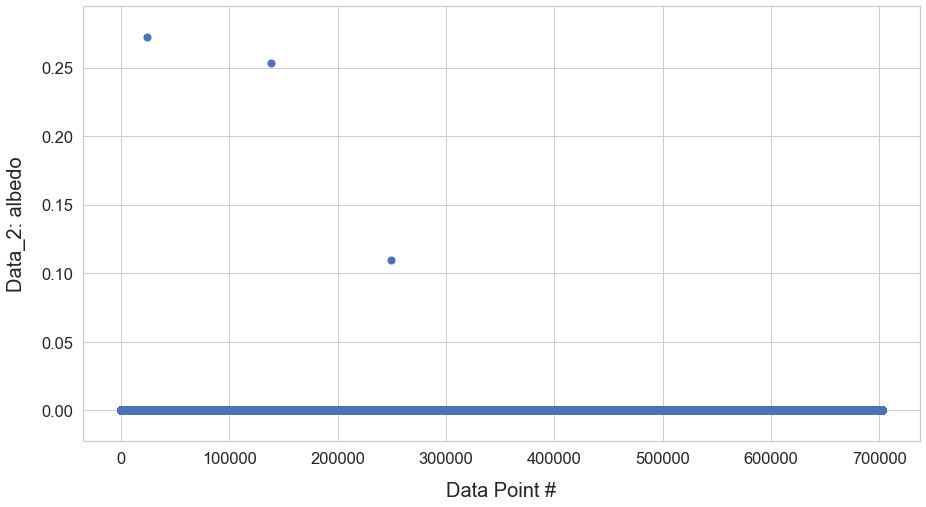

In [25]:
# it appears 'albedo' is also unknown in data_2

# check by plotting data_2['albedo']

plt.figure(figsize = (15, 8))
plt.scatter(np.arange(1, len(data_2) + 1), data_2['albedo'], s = 50, c = 'b')
plt.xlabel('Data Point #', fontsize = 20, labelpad = 15)
plt.ylabel('Data_2: albedo', fontsize = 20, labelpad = 15)
plt.show()

In [26]:
# indeed almost all of the albedo data points in data_2 are 0s and it cannot be used in predictions
# because of this we will remove albedo from both data_1 and data_2

data_1.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'H', 'albedo',
       'moid', 'diameter'],
      dtype='object')

In [27]:
data_1 = data_1[['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'H', 'moid', 'diameter']]

data_1.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,H,moid,diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,3.34,1.594780,939.400
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,4.13,1.233240,545.000
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,5.33,1.034540,246.596
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,3.20,1.139480,525.400
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,6.85,1.095890,106.699
5,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,5.71,0.973965,185.180
6,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,5.51,0.846100,199.830
7,2.201764,0.156499,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655.0,6.49,0.874176,147.491
8,2.385637,0.123114,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821.0,6.28,1.106910,190.000
9,3.141539,0.112461,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175.0,5.43,1.778390,407.120


In [28]:
# in data_2 we drop also the diameter which is unknown

data_2 = data_2[['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'H', 'moid']]

data_2.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,H,moid
681,2.654040,0.171983,11.505648,190.799958,104.993826,2.197591,3.110489,4.323837,40087.0,12.20,1.215450
698,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,11.72,0.624487
718,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,15.40,0.203359
729,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,13.80,0.841461
842,2.279598,0.209766,7.997717,4.071363,316.957206,1.801415,2.757780,3.441878,37579.0,13.80,0.798230
961,2.908998,0.097329,2.602636,145.481660,223.473847,2.625868,3.192128,4.961619,37450.0,11.52,1.624760
984,2.299979,0.277462,4.056565,290.307048,59.553605,1.661822,2.938137,3.488142,35366.0,12.70,0.659274
1008,2.625175,0.455500,15.769676,229.461495,186.428747,1.429408,3.820942,4.253492,34990.0,13.90,0.441373
1010,2.391976,0.350864,5.494744,132.525452,353.279770,1.552718,3.231235,3.699504,34919.0,12.74,0.568578
1064,2.360276,0.297141,8.362855,330.324142,353.652287,1.658942,3.061610,3.626205,33882.0,12.10,0.646392


In [29]:
# finally, we are left with 11 features and diameter as a target in data_1; data_2 consists of features only

In [30]:
# separate features and target from data_1 which we will use with ML models

X_1 = data_1.iloc[:, :-1].values # all columns, but last
y_1 = data_1.iloc[:, -1].values # last column

X_2 = data_2.values # data_2 has only features

In [31]:
# apply XGBRegressor

In [32]:
# split X_1 and y_1 in train/test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)

In [33]:
from xgboost import XGBRegressor

model_1 = XGBRegressor(objective = 'reg:squarederror')

In [34]:
model_1.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)

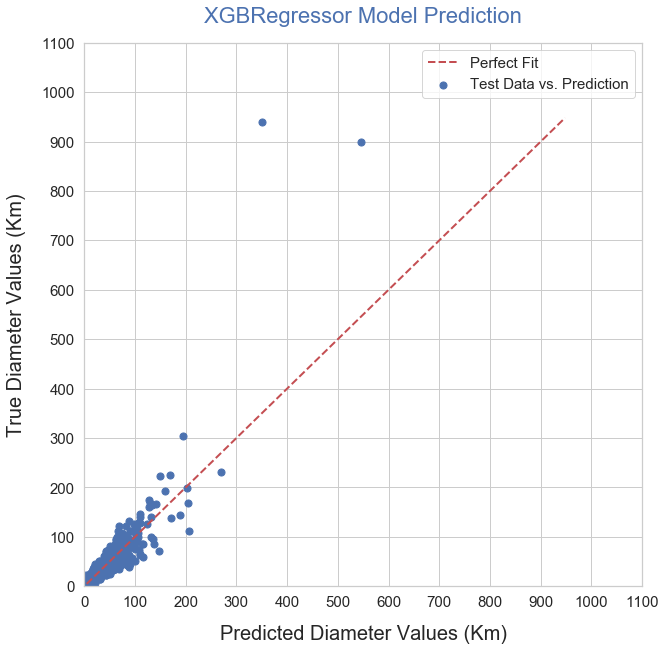

In [35]:
# compare predictions, y_pred_1, to test values, y_test

# create line to represent perfect fit to data test values, y_test

y_line = np.arange(int(y_test.min()) - 10, int(y_test.max()) + 10)

# set axes limits - adjust if necessary
x_min = 0
x_max = y_test.max() + 100
d_x = 100

y_min = 0
y_max = y_test.max() + 100
d_y = 100

plt.figure(figsize = (10, 10))
ax = plt.axes()

ax.set_xlim(x_min, x_max)
ax.set_xticks(np.arange(x_min, x_max + d_x, d_x))

ax.set_ylim(y_min, y_max)
ax.set_yticks(np.arange(y_min, y_max + d_y, d_y))

plt.scatter(y_pred_1, y_test, s = 50, c = 'b', label = 'Test Data vs. Prediction')
plt.plot(y_line, y_line, 'r--', lw = 2, label = 'Perfect Fit')
plt.xlabel('Predicted Diameter Values (Km)', fontsize = 20, labelpad = 15)
plt.ylabel('True Diameter Values (Km)', fontsize = 20, labelpad = 15)
plt.title('XGBRegressor Model Prediction', fontsize = 22, c = 'b', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [36]:
# except for two extreme data points, outliers, predictions are quite accurate being closely grouped around the perfect fit line

In [37]:
# apply Linear Regression and compare results

In [38]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()

In [39]:
model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

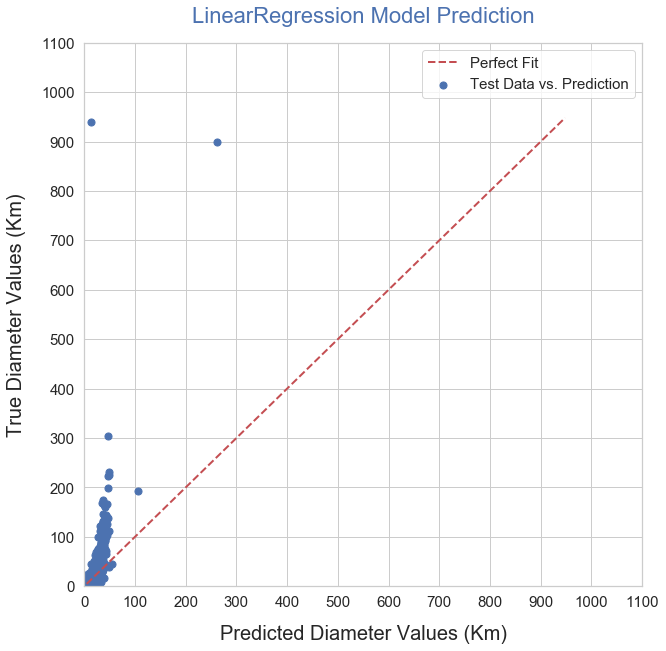

In [40]:
# compare predictions, y_pred_2, to test values, y_test

plt.figure(figsize = (10, 10))
ax = plt.axes()

ax.set_xlim(x_min, x_max)
ax.set_xticks(np.arange(x_min, x_max + d_x, d_x))

ax.set_ylim(y_min, y_max)
ax.set_yticks(np.arange(y_min, y_max + d_y, d_y))

plt.scatter(y_pred_2, y_test, s = 50, c = 'b', label = 'Test Data vs. Prediction')
plt.plot(y_line, y_line, 'r--', lw = 2, label = 'Perfect Fit')
plt.xlabel('Predicted Diameter Values (Km)', fontsize = 20, labelpad = 15)
plt.ylabel('True Diameter Values (Km)', fontsize = 20, labelpad = 15)
plt.title('LinearRegression Model Prediction', fontsize = 22, c = 'b', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [41]:
# LinearRegression model predictions deviate significantly from the perfect fit line and the true data values

In [42]:
# let's plot the XGBRegressor and the Linear Regression models predictions next to each other for better comparison
# also for better visibility we will exclude from the plots the two outliers with very large diameter values

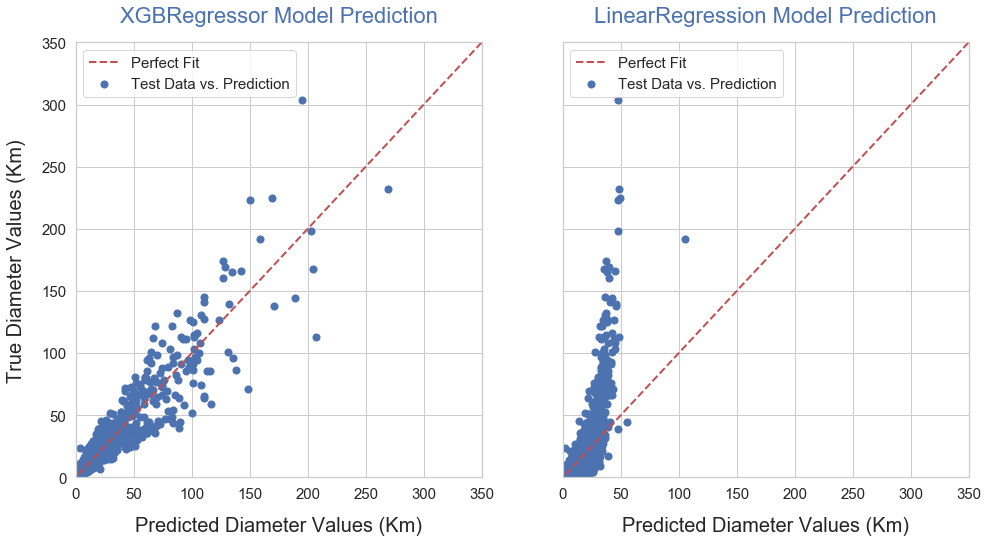

In [43]:
# set axes limits - adjust if necessary
x_min = 0
x_max = 350 # set threshold to exclude the outliers
d_x = 50

y_min = 0
y_max = 350 # set threshold to exclude the outliers
d_y = 50

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))

# XGBRegressor
axes[0].scatter(y_pred_1, y_test, s = 50, c = 'b', label = 'Test Data vs. Prediction')
axes[0].plot(y_line, y_line, 'r--', lw = 2, label = 'Perfect Fit')
axes[0].set_xlabel('Predicted Diameter Values (Km)', fontsize = 20, labelpad = 15)
axes[0].set_ylabel('True Diameter Values (Km)', fontsize = 20, labelpad = 15)
axes[0].set_title('XGBRegressor Model Prediction', fontsize = 22, c = 'b', pad = 20)
axes[0].legend(fontsize = 15)
axes[0].set_xlim(x_min, x_max)
axes[0].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[0].set_ylim(y_min, y_max)
axes[0].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[0].tick_params(labelsize = 15)


# Linear Regression
axes[1].scatter(y_pred_2, y_test, s = 50, c = 'b', label = 'Test Data vs. Prediction')
axes[1].plot(y_line, y_line, 'r--', lw = 2, label = 'Perfect Fit')
axes[1].set_xlabel('Predicted Diameter Values (Km)', fontsize = 20, labelpad = 15)
axes[1].set_title('LinearRegression Model Prediction', fontsize = 22, c = 'b', pad = 20)
axes[1].legend(fontsize = 15)
axes[1].set_xlim(x_min, x_max)
axes[1].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[1].set_ylim(y_min, y_max)
axes[1].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[1].tick_params(labelsize = 15)

plt.show()

In [44]:
# comparison of the predictions next to each other shows dramatic difference in the predictions
# it is clear that XGBRegressor model outperforms the Linear Regression model in a significant way

In [45]:
# For more quantitative analysis let's plot the predictions absolute error in % from the two models

# XGBRegressor prediction error
error_1 = 100 * (np.absolute(y_pred_1 - y_test) / y_test) # absolute error in %


# LinearRegression prediction error
error_2 = 100 * (np.absolute(y_pred_2 - y_test) / y_test) # absolute error in %

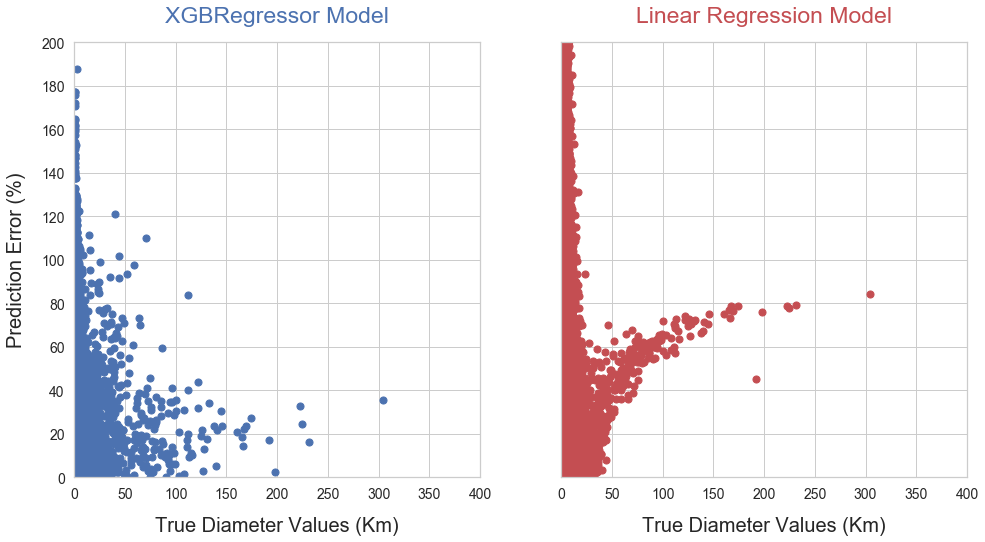

In [46]:
# set axes limits - adjust if necessary
x_min = 0
x_max = 400 # set threshold to exclude the outliers
d_x = 50

y_min = 0
y_max = 200 # limit y axis to include only errors <= 200 %  for better visualization
d_y = 20

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))

# XGBRegressor
axes[0].scatter(y_test, error_1, s = 50, c = 'b')
axes[0].set_title('XGBRegressor Model', fontsize = 23, c = 'b', pad = 20)
axes[0].set_xlabel('True Diameter Values (Km)', fontsize = 20, labelpad = 15)
axes[0].set_ylabel('Prediction Error (%)', fontsize = 20, labelpad = 15)
axes[0].set_xlim(x_min, x_max)
axes[0].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[0].set_ylim(y_min, y_max)
axes[0].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[0].tick_params(labelsize = 14)


# Linear Regression
axes[1].scatter(y_test, error_2, s = 50, c = 'r')
axes[1].set_title('Linear Regression Model', fontsize = 23, c = 'r', pad = 20)
axes[1].set_xlabel('True Diameter Values (Km)', fontsize = 20, labelpad = 15)
axes[1].set_xlim(x_min, x_max)
axes[1].set_xticks(np.arange(x_min, x_max + d_x, d_x))
axes[1].set_ylim(y_min, y_max)
axes[1].set_yticks(np.arange(y_min, y_max + d_y, d_y))
axes[1].tick_params(labelsize = 14)

plt.show()

In [47]:
# two main observations:
    # 1) asteroid diameters < 100 km
            # both models can make large errors, particularly for very small diameter values which is natural to expect
            # however, Linear Regression model has much more large errors, particularly for these small diameter values 
    # 2) asteroid diameters > 100 km, 
            # XGBRegressor error drops below 40 %
            # Linear Regression error is above 60 % reaching up to 80 % (more than 2x that of XGBRegressor model)

In [48]:
# further analysis of the accuracy of the predictions --> obtain the histograms of the prediction errors

error_1 = error_1[error_1 < 300] # truncate at 300 % for better visualization
error_2 = error_2[error_2 < 300] # truncate at 300 % for better visualization

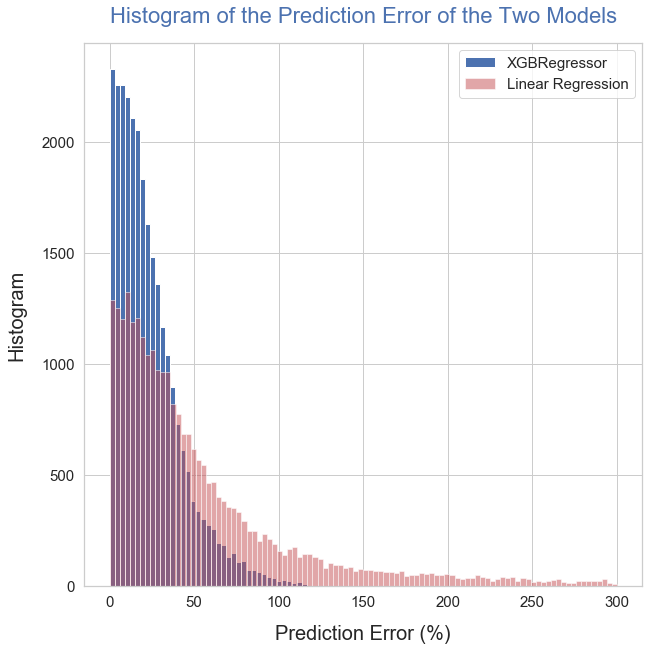

In [49]:
plt.figure(figsize = (10, 10))

plt.hist(error_1, bins = 100, color = 'b', label = 'XGBRegressor')
plt.hist(error_2, bins = 100, color = 'r', alpha = 0.5, label = 'Linear Regression')
plt.xlabel('Prediction Error (%)', fontsize = 20, labelpad = 15)
plt.ylabel('Histogram', fontsize = 20, labelpad = 15)
plt.title('Histogram of the Prediction Error of the Two Models', fontsize = 22, c = 'b', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [50]:
# XGBRegressor model: 
    # error values are confined mostly withing 50 %; very small number extends beyond 50 %
# Linear Regression model: 
    # significant portion of error values spill well beyond the 50 % mark 
    # the distribution tail reaches much further indicating reasonable probability of very large errors

In [51]:
# finally, compare the Mean and Standard Deviation of the error for the two models 

print('XGBRegressor Mean Error: ', np.round(error_1.mean(), 1))
print('XGBRegressor Error Standard Deviation: ', np.round(error_1.std(), 1))
print('\n')
print('Linear Regression Mean Error: ', np.round(error_2.mean(), 1))
print('Linear Regression Error Standard Deviation: ', np.round(error_2.std(), 1))

XGBRegressor Mean Error:  23.8
XGBRegressor Error Standard Deviation:  20.9


Linear Regression Mean Error:  53.7
Linear Regression Error Standard Deviation:  55.9


In [52]:
# Conclusion from the models comparison:
    # XGBRegressor model is much more accurate with error mean and std less than half of that for Linear Regression model

In [53]:
# Final step: Predict the asteroid diameter values for the asteroids with unknown diameter, data_2, using XGBRegressor model

In [54]:
# use XGBREgressor model_1 trained on the complete set of X_1 and y_1 to predict diameter values from data_2 features, X_2

model_1.fit(X_1, y_1)

y_pred_1b = model_1.predict(X_2)

In [55]:
# we have nothing to compare to, so we will create some simple plots to examine the properties of the predicted values

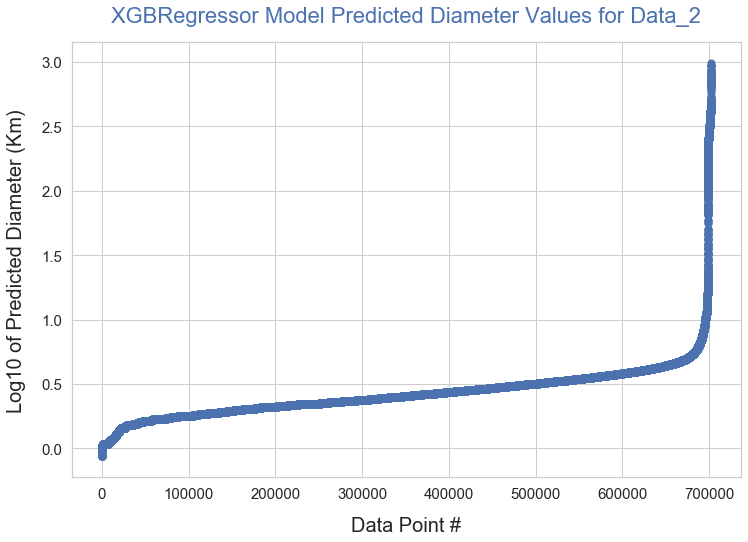

In [56]:
# plot predicted diameter values in ascending order

plt.figure(figsize = (12, 8))

plt.scatter(np.arange(1, len(X_2) +1), np.sort(np.log10(y_pred_1b)), s = 50, color = 'b')
# use log10 in order to see well all values

plt.xlabel('Data Point #', fontsize = 20, labelpad = 15)
plt.ylabel('Log10 of Predicted Diameter (Km)', fontsize = 20, labelpad = 15)
plt.title('XGBRegressor Model Predicted Diameter Values for Data_2', fontsize = 22, c = 'b', pad = 20)
plt.tick_params(labelsize = 15)
plt.show()

In [57]:
# Main observations from the plot
    # some of the smallest diameter values are less than 1 km since we observe negative values for log10(y_pred_1b)
    # the largest values reach 1000 km --> 10 ** 3
    # note that we have 702055 predicted values, 
        # the plot shows that vast majority of the predicted values (~ 690000 points) are less than 10 Km (10 ** 1)

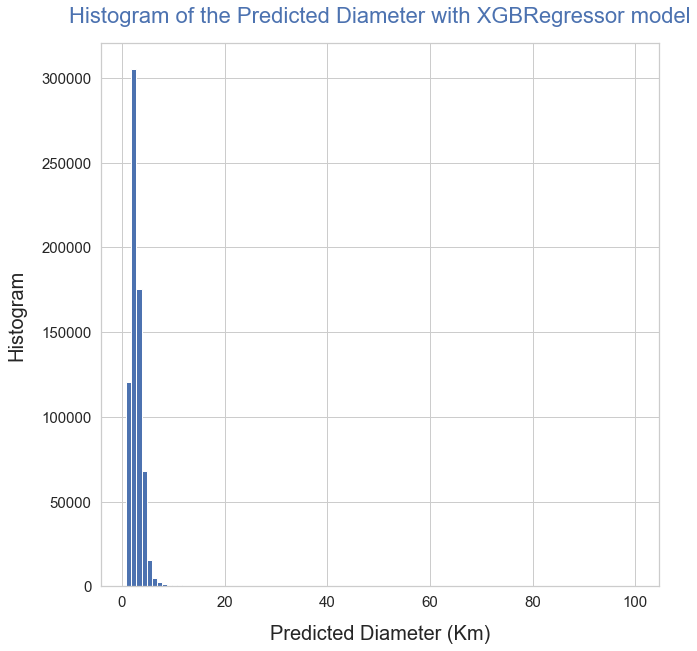

In [58]:
# plot histogram of the predicted diameter values
# as a first step, based on our observations above we will truncate the histogram to values below 100 Km

plt.figure(figsize = (10, 10))

plt.hist(y_pred_1b[y_pred_1b < 100], bins = 100, color = 'b') # truncate prediction values to 100 Km
plt.xlabel('Predicted Diameter (Km)', fontsize = 20, labelpad = 15)
plt.ylabel('Histogram', fontsize = 20, labelpad = 15)
plt.title('Histogram of the Predicted Diameter with XGBRegressor model', fontsize = 22, c = 'b', pad = 20)
plt.tick_params(labelsize = 15)
plt.show()

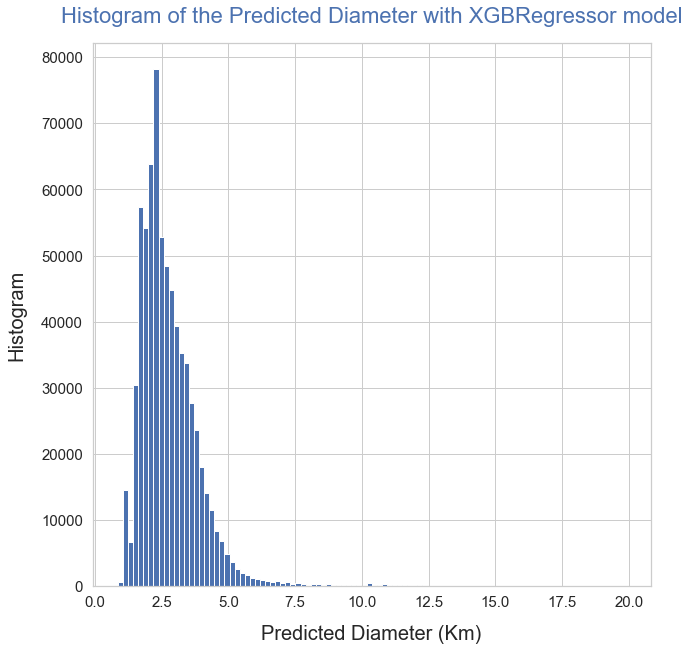

In [59]:
# majority of predicted diameter values are below 20 km --> use 20 Km as an upper limit

plt.figure(figsize = (10, 10))

plt.hist(y_pred_1b[y_pred_1b < 20], bins = 100, color = 'b') # truncate prediction values to 20 Km
plt.xlabel('Predicted Diameter (Km)', fontsize = 20, labelpad = 15)
plt.ylabel('Histogram', fontsize = 20, labelpad = 15)
plt.title('Histogram of the Predicted Diameter with XGBRegressor model', fontsize = 22, c = 'b', pad = 20)
plt.tick_params(labelsize = 15)
plt.show()

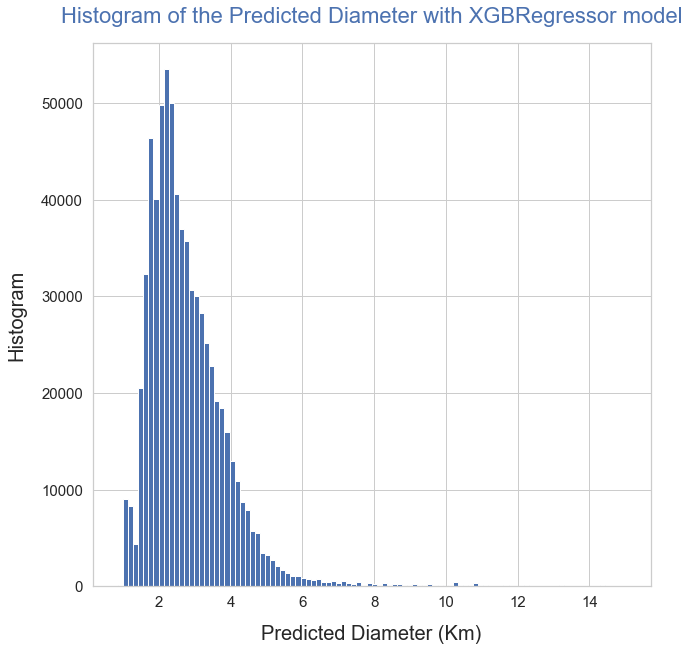

In [60]:
# final plot with 15 Km as an upper limit

plt.figure(figsize = (10, 10))

plt.hist(y_pred_1b[y_pred_1b < 15], bins = 100, color = 'b') # truncate prediction values to 15 Km
plt.xlabel('Predicted Diameter (Km)', fontsize = 20, labelpad = 15)
plt.ylabel('Histogram', fontsize = 20, labelpad = 15)
plt.title('Histogram of the Predicted Diameter with XGBRegressor model', fontsize = 22, c = 'b', pad = 20)
plt.tick_params(labelsize = 15)
plt.show()

In [61]:
# predicted diameter values from data_2 have Poisson-like distribution
# due to lack of expertise in Astronomy and not being able to find definitive answers on the Web, 
# we cannot confirm that this distribution matches expectations
# we would like to note also that it is not clear what kind of asteroids the data has been collected for
# any feedback from experts in the field would be greatly appreciated!

In [62]:
# At the end, we combine the predicted diameter values with features data to complete the data as our final delivarable

data_2.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,H,moid
681,2.654040,0.171983,11.505648,190.799958,104.993826,2.197591,3.110489,4.323837,40087.0,12.20,1.215450
698,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,11.72,0.624487
718,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,15.40,0.203359
729,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,13.80,0.841461
842,2.279598,0.209766,7.997717,4.071363,316.957206,1.801415,2.757780,3.441878,37579.0,13.80,0.798230
961,2.908998,0.097329,2.602636,145.481660,223.473847,2.625868,3.192128,4.961619,37450.0,11.52,1.624760
984,2.299979,0.277462,4.056565,290.307048,59.553605,1.661822,2.938137,3.488142,35366.0,12.70,0.659274
1008,2.625175,0.455500,15.769676,229.461495,186.428747,1.429408,3.820942,4.253492,34990.0,13.90,0.441373
1010,2.391976,0.350864,5.494744,132.525452,353.279770,1.552718,3.231235,3.699504,34919.0,12.74,0.568578
1064,2.360276,0.297141,8.362855,330.324142,353.652287,1.658942,3.061610,3.626205,33882.0,12.10,0.646392


In [63]:
# reset data_2 indices before adding the predicted diameter values

data_2 = data_2.reset_index(drop = True)

data_2.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,H,moid
0,2.654040,0.171983,11.505648,190.799958,104.993826,2.197591,3.110489,4.323837,40087.0,12.20,1.215450
1,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,11.72,0.624487
2,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,15.40,0.203359
3,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,13.80,0.841461
4,2.279598,0.209766,7.997717,4.071363,316.957206,1.801415,2.757780,3.441878,37579.0,13.80,0.798230
5,2.908998,0.097329,2.602636,145.481660,223.473847,2.625868,3.192128,4.961619,37450.0,11.52,1.624760
6,2.299979,0.277462,4.056565,290.307048,59.553605,1.661822,2.938137,3.488142,35366.0,12.70,0.659274
7,2.625175,0.455500,15.769676,229.461495,186.428747,1.429408,3.820942,4.253492,34990.0,13.90,0.441373
8,2.391976,0.350864,5.494744,132.525452,353.279770,1.552718,3.231235,3.699504,34919.0,12.74,0.568578
9,2.360276,0.297141,8.362855,330.324142,353.652287,1.658942,3.061610,3.626205,33882.0,12.10,0.646392


In [64]:
# transfrom y_pred_1b array into series with name 'diameter'

y_pred_1b = pd.Series(y_pred_1b, name = 'diameter')
y_pred_1b.head(10)

0    12.835646
1    15.836289
2     7.744624
3     6.937665
4     7.041404
5    16.612211
6     8.591853
7     7.688478
8     8.946400
9    11.652201
Name: diameter, dtype: float32

In [65]:
# finally, combine features with predicted diameter values

data_2 = pd.concat([data_2, y_pred_1b], axis = 1)
data_2.head(10)

,a,e,i,om,w,q,ad,per_y,data_arc,H,moid,diameter
0,2.654040,0.171983,11.505648,190.799958,104.993826,2.197591,3.110489,4.323837,40087.0,12.20,1.215450,12.835646
1,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,11.72,0.624487,15.836289
2,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,15.40,0.203359,7.744624
3,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,13.80,0.841461,6.937665
4,2.279598,0.209766,7.997717,4.071363,316.957206,1.801415,2.757780,3.441878,37579.0,13.80,0.798230,7.041404
5,2.908998,0.097329,2.602636,145.481660,223.473847,2.625868,3.192128,4.961619,37450.0,11.52,1.624760,16.612211
6,2.299979,0.277462,4.056565,290.307048,59.553605,1.661822,2.938137,3.488142,35366.0,12.70,0.659274,8.591853
7,2.625175,0.455500,15.769676,229.461495,186.428747,1.429408,3.820942,4.253492,34990.0,13.90,0.441373,7.688478
8,2.391976,0.350864,5.494744,132.525452,353.279770,1.552718,3.231235,3.699504,34919.0,12.74,0.568578,8.946400
9,2.360276,0.297141,8.362855,330.324142,353.652287,1.658942,3.061610,3.626205,33882.0,12.10,0.646392,11.652201


In [66]:
# Data is complete, the predicted asteroid diameter values are included, and we have accomplished the project's objective.